## Begin

### Moduls

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

### Import CSV

In [2]:
data = pd.read_csv("flights_NY.csv")
data

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


### Correct dep_time and arr_time

In [3]:
data['dep_time'] = (data['dep_time']//100)*60 + data['dep_time']%100
data['dep_time']

0         317.0
1         333.0
2         342.0
3         344.0
4         354.0
          ...  
336771      NaN
336772      NaN
336773      NaN
336774      NaN
336775      NaN
Name: dep_time, Length: 336776, dtype: float64

In [4]:
data['arr_time'] = (data['arr_time']//100)*60 + data['arr_time']%100
data['arr_time']

0         510.0
1         530.0
2         563.0
3         604.0
4         492.0
          ...  
336771      NaN
336772      NaN
336773      NaN
336774      NaN
336775      NaN
Name: arr_time, Length: 336776, dtype: float64

## Analysis NaN

### Find NaN-cells

In [5]:
data_isnull = data.isnull()
#data_isnull.sum()

### Find NaN-rows  (at least one)

In [6]:
data_isnull['have_NaN'] = (data_isnull['dep_time']
                    | data_isnull['dep_delay']
                    | data_isnull['arr_time']
                    | data_isnull['arr_delay']
                    | data_isnull['tailnum']
                    | data_isnull['air_time'])
#data_isnull

### Create DataFrame with NaN-rows (at least one)

In [7]:
data_withNaN = data[data_isnull['have_NaN']]
#data_withNaN

### Count NaN-rows

In [8]:
len(data_withNaN)

9430

### Create DataFrame without NaN-rows (no one)

In [9]:
data_noNaN = data[data_isnull['have_NaN'] == 0]
#data_noNaN

#### month

February is the popular month in NaN-rows (but not October)

In [10]:
print(data_noNaN['month'].mode())
print(data_withNaN['month'].mode())
print(data['month'].mode())

0    8
Name: month, dtype: int64
0    2
Name: month, dtype: int64
0    7
Name: month, dtype: int64


In [11]:
print((data_noNaN['month'] == 2).sum()/data_noNaN['month'].count())
print((data_withNaN['month'] == 2).sum()/data_withNaN['month'].count())
print((data['month'] == 2).sum()/data['month'].count())

0.07212857343605848
0.1420996818663839
0.07408782098486828


In [12]:
print((data_noNaN['month'] == 7).sum()/data_noNaN['month'].count())
print((data_withNaN['month'] == 7).sum()/data_withNaN['month'].count())
print((data['month'] == 7).sum()/data['month'].count())

0.08643148228479958
0.1200424178154825
0.08737261562581657


In [13]:
print((data_noNaN['month'] == 8).sum()/data_noNaN['month'].count())
print((data_withNaN['month'] == 8).sum()/data_withNaN['month'].count())
print((data['month'] == 8).sum()/data['month'].count())

0.0878458878373342
0.060551431601272535
0.0870816210181248


#### day

On average day of departure is the middle of month (regardless of NaN-row)

In [14]:
print(data_noNaN['day'].mean())
print(data_withNaN['day'].mean())
print(data['day'].mean())

15.740824693138148
14.668080593849417
15.71078699194717


In [15]:
print(data_noNaN['day'].std())
print(data_withNaN['day'].std())
print(data['day'].std())

8.777376040837181
8.392641380474974
8.768607101536873


#### dep_time

On average NaN-rows have departure litle later (about 50 minits) than not-NaN-rows.
And std-value in NaN-rows became smaler.

In [16]:
print(data_noNaN['dep_time'].mean())
print(data_withNaN['dep_time'].mean())
print(data['dep_time'].mean())

821.9754418871775
875.8604255319149
822.1681688537415


In [17]:
print(data_noNaN['dep_time'].std())
print(data_withNaN['dep_time'].std())
print(data['dep_time'].std())

292.75343071300887
281.434335934244
292.7309898605531


#### dep_delay

On average dep_delay in NaN-row has bigger value than total rows
(bud it has bigger std-value than total rows)

In [18]:
print(data_noNaN['dep_delay'].mean())
print(data_withNaN['dep_delay'].mean())
print(data['dep_delay'].mean())

12.555155706805643
36.01702127659574
12.639070257304708


In [19]:
print(data_noNaN['dep_delay'].std())
print(data_withNaN['dep_delay'].std())
print(data['dep_delay'].std())

40.06568758558352
65.58051386361187
40.21006089212995


#### dest

dest insignificantly depend on NaN-rows

In [20]:
print(data_noNaN['dest'].mode())
print(data_withNaN['dest'].mode())
print(data['dest'].mode())

0    ATL
Name: dest, dtype: object
0    ORD
Name: dest, dtype: object
0    ORD
Name: dest, dtype: object


In [21]:
print((data_noNaN['dest'] == "ATL").sum()/data_noNaN['dest'].count())
print((data_withNaN['dest'] == "ATL").sum()/data_withNaN['dest'].count())
print((data['dest'] == "ATL").sum()/data['dest'].count())

0.051434873192279726
0.04008483563096501
0.051117062973608574


In [22]:
print((data_noNaN['dest'] == "ORD").sum()/data_noNaN['dest'].count())
print((data_withNaN['dest'] == "ORD").sum()/data_withNaN['dest'].count())
print((data['dest'] == "ORD").sum()/data['dest'].count())

0.05060700298766443
0.076033934252386
0.051318977599353874


### DataFrame cleaned from NaN-rows

In [23]:
data = data_noNaN

## Histogram of delays

### Create normal delay

#### departure

In [24]:
normal_dep_delay = data['dep_delay'] - data['dep_delay'].mean()

In [25]:
normal_dep_delay = normal_dep_delay/normal_dep_delay.std()

#### arrival

In [26]:
normal_arr_delay = data['arr_delay'] - data['arr_delay'].mean()

In [27]:
normal_arr_delay = normal_arr_delay/normal_arr_delay.std()

### Anamalium and non-anamalium division

#### departure

In [41]:
q = normal_dep_delay.quantile(0.95)

In [42]:
dep_anomaly = normal_dep_delay[normal_dep_delay > q]
normal_dep_delay = normal_dep_delay[normal_dep_delay <= q]

In [43]:
print("count Total     =", data['dep_delay'].count())
print("count Anomalium =", dep_anomaly.count())
print("max Anomalium     = ", dep_anomaly.max())
print("min Anomalium     = ", dep_anomaly.min())
print("max non-Anomalium = ", normal_dep_delay.max())
print("min non-Anomalium =", normal_dep_delay.min())

count Total     = 327346
count Anomalium = 15524
max Anomalium     =  1.9828648671882596
min Anomalium     =  1.0094633770305559
max non-Anomalium =  0.9845043644624096
min non-Anomalium = -1.3866018295114837


#### arrival

In [51]:
q = normal_arr_delay.quantile(0.95)

In [52]:
arr_anomaly = normal_arr_delay[normal_arr_delay > q]
normal_arr_delay = normal_arr_delay[normal_arr_delay <= q]

In [53]:
print("count Total     =", data['arr_delay'].count())
print("count Anomalium =", arr_anomaly.count())
print("max Anomalium     = ", arr_anomaly.max())
print("min Anomalium     = ", arr_anomaly.min())
print("max non-Anomalium = ", normal_arr_delay.max())
print("min non-Anomalium =", normal_arr_delay.min())

count Total     = 327346
count Anomalium = 15615
max Anomalium     =  1.9963713154112166
min Anomalium     =  1.1001792918059297
max non-Anomalium =  1.0777744912157974
min non-Anomalium = -2.0813023919928395


### Histogram

#### departure

<Axes: >

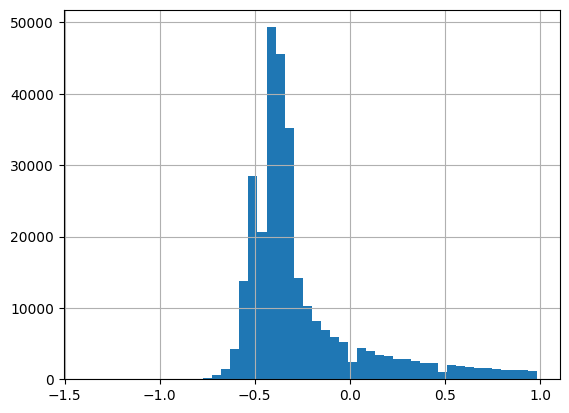

In [54]:
normal_dep_delay.hist(bins = 50, label = "nearest 95%")


<Axes: >

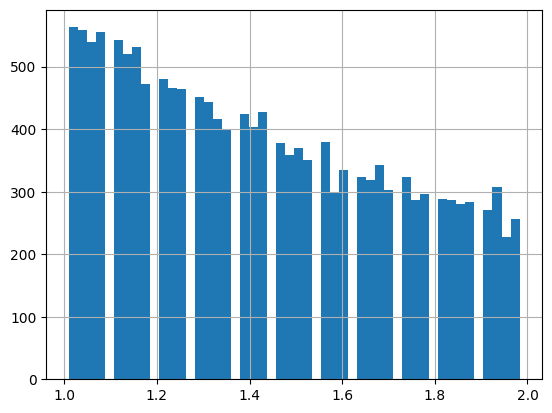

In [55]:
dep_anomaly.hist(bins = 50, label = "very far 5%")

#### arrival

<Axes: >

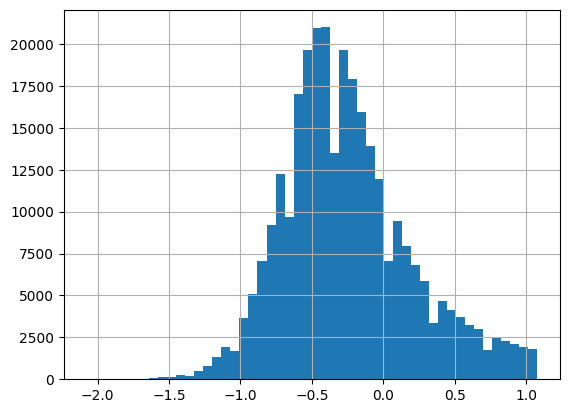

In [56]:
normal_arr_delay.hist(bins = 50, label = "nearest 95%")


<Axes: >

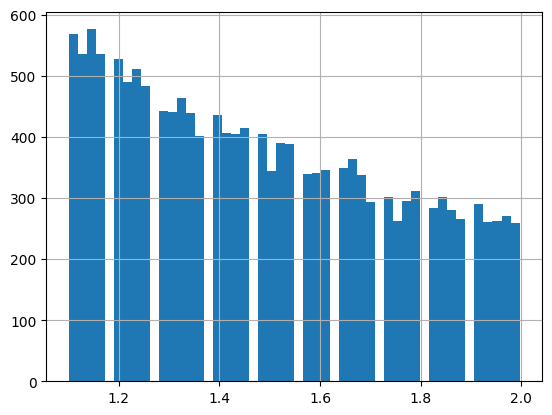

In [57]:
arr_anomaly.hist(bins = 50, label = "very far 5%")

The number of positive values in monotone decreases in the amount of delays

## Delay's Analysis

### departure

In [58]:
departure = data['dep_delay']
#departure

In [59]:
print('mean   =', departure.mean())
print('median =', departure.median())
print('std    =', departure.std())

mean   = 12.555155706805643
median = -2.0
std    = 40.06568758558352


### arrive

In [60]:
arrive = data['arr_delay']
#arrive

In [61]:
print('mean   =', arrive.mean())
print('median =', arrive.median())
print('std    =', arrive.std())

mean   = 6.89537675731489
median = -5.0
std    = 44.63329169019399


## Confidence interval of average delay

In [84]:
carriers = list(data['carrier'].value_counts().index)

In [113]:
def quantils(carrier):
    my_data = data[data['carrier'] == carrier]['dep_delay']
    return str((my_data.quantile(0.025), my_data.quantile(0.975)))
def means(carrier):
    my_data = data[data['carrier'] == carrier]['dep_delay']
    return my_data.mean()

In [114]:
ans1 = [quantils(carrier) for carrier in carriers]
ans2 = [means(carrier) for carrier in carriers]

In [119]:
answer = pd.DataFrame([],carriers)
answer['Confidence interval'] = ans1
answer['Mean'] = ans2
answer.sort_values('Mean')

,Confidence interval,Mean
US,"(-11.0, 80.0)",3.744693
HA,"(-11.475, 83.2749999999997)",4.900585
AS,"(-14.3, 106.09999999999968)",5.830748
AA,"(-10.0, 114.0)",8.569130
DL,"(-9.0, 113.0)",9.223950
MQ,"(-12.0, 118.0)",10.445381
UA,"(-9.0, 115.0)",12.016908
OO,"(-13.3, 137.9)",12.586207
VX,"(-9.0, 150.0)",12.756646
B6,"(-10.0, 130.0)",12.967548


<Axes: xlabel='carrier'>

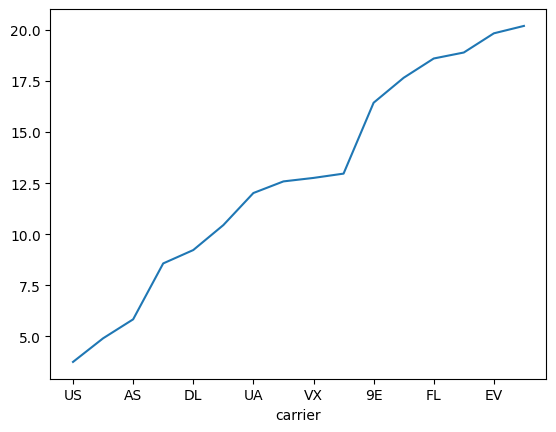

In [124]:
sorted_data = data.groupby('carrier')['dep_delay'].mean().sort_values().plot()
sorted_data

## Are means of AA and DL equal?

$$X_1,\dots,X_n\sim {\cal L}(X)$$
$$Y_1,\dots,Y_m\sim {\cal L}(Y)$$

$$H_0: \mathbb{E}X=\mathbb{E}Y$$
$$H_1: \mathbb{E}X\not=\mathbb{E}Y$$

$H_0:$
$$\mathbb{E}X-\mathbb{E}Y=0$$
$$X-Y\sim N\left(0,\sqrt{\mathbb{D}X+\mathbb{D}Y}\right)$$
$$\overline X-\overline Y\sim N\left(0,\sqrt{\frac{\mathbb{D}X}{n}+\frac{\mathbb{D}Y}{m}}\right)$$
$$\frac{\overline X-\overline Y}{\sqrt{\frac{\mathbb{D}X}{n}+\frac{\mathbb{D}Y}{m}}}\sim N(0,1)$$

$H_0:$
$$P(\mathbb{E}X=\mathbb{E}Y)=$$
$$=P\left(\frac{\overline X-\overline Y}{\sqrt{\frac{\mathbb{D}X}{n}+\frac{\mathbb{D}Y}{m}}}\sim N(0,1)\right)$$

In [149]:
DataAA = data[data['carrier'] == 'AA']['dep_delay']
#DataAA

In [150]:
DataDL = data[data['carrier'] == 'DL']['dep_delay']
#DataDL

In [151]:
Ex = DataAA.mean()
Ey = DataDL.mean()
Dx = DataAA.std() ** 2
Dy = DataDL.std() ** 2
n = DataAA.count()
m = DataDL.count()
Normal = (Ex - Ey)/ (Dx/n+Dy/m) ** 0.5
Normal

31947


-2.3644084232769744

In [148]:
import scipy.stats as sp
sp.norm.cdf(Normal)

0.00902944571770893

$H_0:$
$$P(\mathbb{E}X=\mathbb{E}Y)\approx0.009$$

Significance level should be more than 0.009